In [1]:
from data import MVTecDataset, mvtec_classes, DEFAULT_SIZE
from patch_core import PatchCore
from utils import backbones, dataset_scale_factor

ALL_CLASSES = mvtec_classes()

In [2]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import PIL
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import torch



# test

In [8]:
def run_model(
        classes: list = ALL_CLASSES,
        backbone: str = 'WideResNet50'
) -> None:

    f_coreset = 0.1

    # Vanilla or Clip version
    vanilla = backbone == "WideResNet50"

    results = {}    # key = class, Value = [image-level ROC AUC, pixel-level ROC AUC]
    if vanilla:
        size = DEFAULT_SIZE
    elif backbone == 'ResNet50':    # RN50
        size = 224
    elif backbone == 'ResNet50-4':  # RN50x4
        size = 288
    elif backbone == 'ResNet50-16': # RN50x16
        size = 384
    elif backbone == 'ResNet101':   # RN50x101
        size = 224
    else:
        raise Exception('You can use the following nets: ResNet50, ResNet50-4, ResNet50-16, ResNet50-64, ResNet101')

    print(f'Running PatchCore...')
    for cls in classes:
        train_dl, test_dl = MVTecDataset(cls, size=size, vanilla=vanilla).get_dataloaders()
        patch_core = PatchCore(f_coreset, vanilla=vanilla, backbone=backbones[backbone], image_size=size)

        print(f'\nClass {cls}:')
        print(f'Training...')
        patch_core.fit(train_dl, scale=dataset_scale_factor[backbone])

        print(f'Testing...')
        image_rocauc, pixel_rocauc = patch_core.evaluate(test_dl)

        print(f'Results:')
        results[cls] = [float(image_rocauc), float(pixel_rocauc)]
        print(f'- Image-level ROC AUC = {image_rocauc:.3f}')
        print(f'- Iixel-level ROC AUC = {pixel_rocauc:.3f}\n')

    # Save global results and statistics
    image_results = [v[0] for k, v in results.items()]
    average_image_rocauc = sum(image_results) / len(image_results)
    pixel_resuts = [v[1] for k, v in results.items()]
    average_pixel_rocauc = sum(pixel_resuts) / len(pixel_resuts)

    print(f'- Average image-level ROC AUC = {average_image_rocauc:.3f}\n')
    print(f'- Average pixel-level ROC AUC = {average_pixel_rocauc:.3f}\n')




In [3]:
run_model()

Running PatchCore...
Class 'bottle' has been found in 'datasets/'

Vanilla Mode
Net Used: wide_resnet50_2


Using cache found in C:\Users\slowm/.cache\torch\hub\pytorch_vision_v0.13.0
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Class bottle:
Training...


100%|██████████| 209/209 [00:31<00:00,  6.72it/s]


Start Coreset Subsampling...


100%|██████████| 16384/16384 [01:49<00:00, 150.21it/s]


Testing...


100%|██████████| 83/83 [00:36<00:00,  2.28it/s]


Results:
- Image-level ROC AUC = 1.000
- Iixel-level ROC AUC = 0.979

Class 'cable' has been found in 'datasets/'

Vanilla Mode
Net Used: wide_resnet50_2


Using cache found in C:\Users\slowm/.cache\torch\hub\pytorch_vision_v0.13.0
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Class cable:
Training...


100%|██████████| 224/224 [00:31<00:00,  7.05it/s]


Start Coreset Subsampling...


100%|██████████| 17560/17560 [02:07<00:00, 138.09it/s]


Testing...


100%|██████████| 150/150 [01:14<00:00,  2.02it/s]


Results:
- Image-level ROC AUC = 0.986
- Iixel-level ROC AUC = 0.980

Class 'capsule' has been found in 'datasets/'

Vanilla Mode
Net Used: wide_resnet50_2


Using cache found in C:\Users\slowm/.cache\torch\hub\pytorch_vision_v0.13.0
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Class capsule:
Training...


100%|██████████| 219/219 [00:31<00:00,  7.03it/s]


Start Coreset Subsampling...


100%|██████████| 17168/17168 [02:01<00:00, 140.79it/s]


Testing...


100%|██████████| 132/132 [01:07<00:00,  1.96it/s]


Results:
- Image-level ROC AUC = 0.972
- Iixel-level ROC AUC = 0.984

Class 'carpet' has been found in 'datasets/'

Vanilla Mode
Net Used: wide_resnet50_2


Using cache found in C:\Users\slowm/.cache\torch\hub\pytorch_vision_v0.13.0
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Class carpet:
Training...


100%|██████████| 280/280 [00:40<00:00,  6.96it/s]


Start Coreset Subsampling...


100%|██████████| 21951/21951 [03:20<00:00, 109.36it/s]


Testing...


100%|██████████| 117/117 [01:06<00:00,  1.75it/s]


Results:
- Image-level ROC AUC = 0.985
- Iixel-level ROC AUC = 0.984

Class 'grid' has been found in 'datasets/'

Vanilla Mode
Net Used: wide_resnet50_2


Using cache found in C:\Users\slowm/.cache\torch\hub\pytorch_vision_v0.13.0
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Class grid:
Training...


100%|██████████| 264/264 [00:32<00:00,  8.17it/s]


Start Coreset Subsampling...


100%|██████████| 20696/20696 [02:55<00:00, 117.84it/s]


Testing...


100%|██████████| 78/78 [00:43<00:00,  1.79it/s]


Results:
- Image-level ROC AUC = 0.944
- Iixel-level ROC AUC = 0.957

Class 'hazelnut' has not been found in 'datasets/'. Downloading... 

Correctly Downloaded 

Vanilla Mode
Net Used: wide_resnet50_2


Using cache found in C:\Users\slowm/.cache\torch\hub\pytorch_vision_v0.13.0
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Class hazelnut:
Training...


100%|██████████| 391/391 [00:54<00:00,  7.23it/s]


Start Coreset Subsampling...


100%|██████████| 30653/30653 [06:37<00:00, 77.19it/s]


Testing...


100%|██████████| 110/110 [01:17<00:00,  1.42it/s]


Results:
- Image-level ROC AUC = 1.000
- Iixel-level ROC AUC = 0.982

Class 'leather' has not been found in 'datasets/'. Downloading... 

Correctly Downloaded 

Vanilla Mode
Net Used: wide_resnet50_2


Using cache found in C:\Users\slowm/.cache\torch\hub\pytorch_vision_v0.13.0
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Class leather:
Training...


100%|██████████| 245/245 [00:32<00:00,  7.51it/s]


Start Coreset Subsampling...


100%|██████████| 19207/19207 [02:31<00:00, 126.58it/s]


Testing...


100%|██████████| 124/124 [01:05<00:00,  1.89it/s]


Results:
- Image-level ROC AUC = 1.000
- Iixel-level ROC AUC = 0.986

Class 'metal_nut' has not been found in 'datasets/'. Downloading... 

Correctly Downloaded 

Vanilla Mode
Net Used: wide_resnet50_2


Using cache found in C:\Users\slowm/.cache\torch\hub\pytorch_vision_v0.13.0
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Class metal_nut:
Training...


100%|██████████| 220/220 [00:26<00:00,  8.31it/s]


Start Coreset Subsampling...


100%|██████████| 17247/17247 [02:00<00:00, 142.97it/s]


Testing...


100%|██████████| 115/115 [00:51<00:00,  2.24it/s]


Results:
- Image-level ROC AUC = 0.998
- Iixel-level ROC AUC = 0.969

Class 'pill' has not been found in 'datasets/'. Downloading... 

Correctly Downloaded 

Vanilla Mode
Net Used: wide_resnet50_2


Using cache found in C:\Users\slowm/.cache\torch\hub\pytorch_vision_v0.13.0
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Class pill:
Training...


100%|██████████| 267/267 [00:33<00:00,  8.05it/s]


Start Coreset Subsampling...


100%|██████████| 20931/20931 [03:00<00:00, 116.25it/s]


Testing...


100%|██████████| 167/167 [01:29<00:00,  1.87it/s]


Results:
- Image-level ROC AUC = 0.940
- Iixel-level ROC AUC = 0.988

Class 'screw' has not been found in 'datasets/'. Downloading... 

Correctly Downloaded 

Vanilla Mode
Net Used: wide_resnet50_2


Using cache found in C:\Users\slowm/.cache\torch\hub\pytorch_vision_v0.13.0
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Class screw:
Training...


100%|██████████| 320/320 [00:38<00:00,  8.23it/s]


Start Coreset Subsampling...


100%|██████████| 25087/25087 [04:22<00:00, 95.70it/s]


Testing...


100%|██████████| 160/160 [01:31<00:00,  1.74it/s]


Results:
- Image-level ROC AUC = 0.964
- Iixel-level ROC AUC = 0.985

Class 'tile' has not been found in 'datasets/'. Downloading... 

Correctly Downloaded 

Vanilla Mode
Net Used: wide_resnet50_2


Using cache found in C:\Users\slowm/.cache\torch\hub\pytorch_vision_v0.13.0
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Class tile:
Training...


100%|██████████| 230/230 [00:30<00:00,  7.60it/s]


Start Coreset Subsampling...


100%|██████████| 18031/18031 [02:13<00:00, 135.39it/s]


Testing...


100%|██████████| 117/117 [00:55<00:00,  2.12it/s]


Results:
- Image-level ROC AUC = 0.986
- Iixel-level ROC AUC = 0.948

Class 'toothbrush' has not been found in 'datasets/'. Downloading... 

Correctly Downloaded 

Vanilla Mode
Net Used: wide_resnet50_2


Using cache found in C:\Users\slowm/.cache\torch\hub\pytorch_vision_v0.13.0
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Class toothbrush:
Training...


100%|██████████| 60/60 [00:08<00:00,  7.34it/s]


Start Coreset Subsampling...


100%|██████████| 4703/4703 [00:09<00:00, 480.23it/s]


Testing...


100%|██████████| 42/42 [00:09<00:00,  4.30it/s]


Results:
- Image-level ROC AUC = 1.000
- Iixel-level ROC AUC = 0.982

Class 'transistor' has not been found in 'datasets/'. Downloading... 

Correctly Downloaded 

Vanilla Mode
Net Used: wide_resnet50_2


Using cache found in C:\Users\slowm/.cache\torch\hub\pytorch_vision_v0.13.0
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Class transistor:
Training...


100%|██████████| 213/213 [00:30<00:00,  6.94it/s]


Start Coreset Subsampling...


100%|██████████| 16698/16698 [01:52<00:00, 147.91it/s]


Testing...


100%|██████████| 100/100 [00:46<00:00,  2.17it/s]


Results:
- Image-level ROC AUC = 1.000
- Iixel-level ROC AUC = 0.978

Class 'wood' has not been found in 'datasets/'. Downloading... 

Correctly Downloaded 

Vanilla Mode
Net Used: wide_resnet50_2


Using cache found in C:\Users\slowm/.cache\torch\hub\pytorch_vision_v0.13.0
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Class wood:
Training...


100%|██████████| 247/247 [00:35<00:00,  7.03it/s]


Start Coreset Subsampling...


100%|██████████| 19363/19363 [02:33<00:00, 126.01it/s]


Testing...


100%|██████████| 79/79 [00:39<00:00,  1.99it/s]


Results:
- Image-level ROC AUC = 0.994
- Iixel-level ROC AUC = 0.931

Class 'zipper' has not been found in 'datasets/'. Downloading... 

Correctly Downloaded 

Vanilla Mode
Net Used: wide_resnet50_2


Using cache found in C:\Users\slowm/.cache\torch\hub\pytorch_vision_v0.13.0
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Class zipper:
Training...


100%|██████████| 240/240 [00:29<00:00,  8.13it/s]


Start Coreset Subsampling...


100%|██████████| 18815/18815 [02:23<00:00, 130.83it/s]


Testing...


100%|██████████| 151/151 [01:14<00:00,  2.01it/s]


Results:
- Image-level ROC AUC = 0.991
- Iixel-level ROC AUC = 0.979

- Average image-level ROC AUC = 0.984

- Average pixel-level ROC AUC = 0.974



In [4]:
run_model(backbone='ResNet50')

Running PatchCore...
Class 'bottle' has been found in 'datasets/'

CLIP Mode
Net Used: RN50

Class bottle:
Training...


100%|██████████| 209/209 [00:16<00:00, 12.45it/s]


Start Coreset Subsampling...


100%|██████████| 16384/16384 [01:50<00:00, 148.85it/s]


Testing...


100%|██████████| 83/83 [00:49<00:00,  1.68it/s]


Results:
- Image-level ROC AUC = 0.992
- Iixel-level ROC AUC = 0.940

Class 'cable' has been found in 'datasets/'

CLIP Mode
Net Used: RN50

Class cable:
Training...


100%|██████████| 224/224 [00:21<00:00, 10.51it/s]


Start Coreset Subsampling...


100%|██████████| 17560/17560 [02:07<00:00, 137.35it/s]


Testing...


100%|██████████| 150/150 [01:39<00:00,  1.51it/s]


Results:
- Image-level ROC AUC = 0.947
- Iixel-level ROC AUC = 0.932

Class 'capsule' has been found in 'datasets/'

CLIP Mode
Net Used: RN50

Class capsule:
Training...


100%|██████████| 219/219 [00:20<00:00, 10.49it/s]


Start Coreset Subsampling...


100%|██████████| 17168/17168 [02:00<00:00, 142.78it/s]


Testing...


100%|██████████| 132/132 [01:25<00:00,  1.54it/s]


Results:
- Image-level ROC AUC = 0.876
- Iixel-level ROC AUC = 0.932

Class 'carpet' has been found in 'datasets/'

CLIP Mode
Net Used: RN50

Class carpet:
Training...


100%|██████████| 280/280 [00:26<00:00, 10.40it/s]


Start Coreset Subsampling...


100%|██████████| 21951/21951 [03:22<00:00, 108.66it/s]


Testing...


100%|██████████| 117/117 [01:28<00:00,  1.33it/s]


Results:
- Image-level ROC AUC = 0.949
- Iixel-level ROC AUC = 0.941

Class 'grid' has been found in 'datasets/'

CLIP Mode
Net Used: RN50

Class grid:
Training...


100%|██████████| 264/264 [00:20<00:00, 12.95it/s]


Start Coreset Subsampling...


100%|██████████| 20696/20696 [02:56<00:00, 117.03it/s]


Testing...


100%|██████████| 78/78 [00:58<00:00,  1.34it/s]


Results:
- Image-level ROC AUC = 0.891
- Iixel-level ROC AUC = 0.809

Class 'hazelnut' has been found in 'datasets/'

CLIP Mode
Net Used: RN50

Class hazelnut:
Training...


100%|██████████| 391/391 [00:36<00:00, 10.81it/s]


Start Coreset Subsampling...


100%|██████████| 30653/30653 [06:37<00:00, 77.08it/s]


Testing...


100%|██████████| 110/110 [01:57<00:00,  1.07s/it]


Results:
- Image-level ROC AUC = 0.976
- Iixel-level ROC AUC = 0.964

Class 'leather' has been found in 'datasets/'

CLIP Mode
Net Used: RN50

Class leather:
Training...


100%|██████████| 245/245 [00:22<00:00, 10.99it/s]


Start Coreset Subsampling...


100%|██████████| 19207/19207 [02:30<00:00, 127.42it/s]


Testing...


100%|██████████| 124/124 [01:29<00:00,  1.39it/s]


Results:
- Image-level ROC AUC = 1.000
- Iixel-level ROC AUC = 0.928

Class 'metal_nut' has been found in 'datasets/'

CLIP Mode
Net Used: RN50

Class metal_nut:
Training...


100%|██████████| 220/220 [00:17<00:00, 12.90it/s]


Start Coreset Subsampling...


100%|██████████| 17247/17247 [02:00<00:00, 143.18it/s]


Testing...


100%|██████████| 115/115 [01:13<00:00,  1.57it/s]


Results:
- Image-level ROC AUC = 0.934
- Iixel-level ROC AUC = 0.958

Class 'pill' has been found in 'datasets/'

CLIP Mode
Net Used: RN50

Class pill:
Training...


100%|██████████| 267/267 [00:21<00:00, 12.28it/s]


Start Coreset Subsampling...


100%|██████████| 20931/20931 [03:01<00:00, 115.59it/s]


Testing...


100%|██████████| 167/167 [02:07<00:00,  1.31it/s]


Results:
- Image-level ROC AUC = 0.834
- Iixel-level ROC AUC = 0.966

Class 'screw' has been found in 'datasets/'

CLIP Mode
Net Used: RN50

Class screw:
Training...


100%|██████████| 320/320 [00:24<00:00, 12.95it/s]


Start Coreset Subsampling...


100%|██████████| 25087/25087 [04:22<00:00, 95.59it/s]


Testing...


100%|██████████| 160/160 [02:19<00:00,  1.14it/s]


Results:
- Image-level ROC AUC = 0.823
- Iixel-level ROC AUC = 0.896

Class 'tile' has been found in 'datasets/'

CLIP Mode
Net Used: RN50

Class tile:
Training...


100%|██████████| 230/230 [00:19<00:00, 11.59it/s]


Start Coreset Subsampling...


100%|██████████| 18031/18031 [02:13<00:00, 135.26it/s]


Testing...


100%|██████████| 117/117 [01:17<00:00,  1.52it/s]


Results:
- Image-level ROC AUC = 0.995
- Iixel-level ROC AUC = 0.886

Class 'toothbrush' has been found in 'datasets/'

CLIP Mode
Net Used: RN50

Class toothbrush:
Training...


100%|██████████| 60/60 [00:05<00:00, 10.89it/s]


Start Coreset Subsampling...


100%|██████████| 4703/4703 [00:09<00:00, 479.28it/s]


Testing...


100%|██████████| 42/42 [00:11<00:00,  3.68it/s]


Results:
- Image-level ROC AUC = 0.917
- Iixel-level ROC AUC = 0.962

Class 'transistor' has been found in 'datasets/'

CLIP Mode
Net Used: RN50

Class transistor:
Training...


100%|██████████| 213/213 [00:20<00:00, 10.38it/s]


Start Coreset Subsampling...


100%|██████████| 16698/16698 [01:54<00:00, 145.30it/s]


Testing...


100%|██████████| 100/100 [01:02<00:00,  1.59it/s]


Results:
- Image-level ROC AUC = 0.902
- Iixel-level ROC AUC = 0.970

Class 'wood' has been found in 'datasets/'

CLIP Mode
Net Used: RN50

Class wood:
Training...


100%|██████████| 247/247 [00:23<00:00, 10.32it/s]


Start Coreset Subsampling...


100%|██████████| 19363/19363 [02:33<00:00, 125.84it/s]


Testing...


100%|██████████| 79/79 [00:58<00:00,  1.35it/s]


Results:
- Image-level ROC AUC = 0.995
- Iixel-level ROC AUC = 0.802

Class 'zipper' has been found in 'datasets/'

CLIP Mode
Net Used: RN50

Class zipper:
Training...


100%|██████████| 240/240 [00:17<00:00, 13.38it/s]


Start Coreset Subsampling...


100%|██████████| 18815/18815 [02:23<00:00, 130.73it/s]


Testing...


100%|██████████| 151/151 [01:39<00:00,  1.51it/s]


Results:
- Image-level ROC AUC = 0.948
- Iixel-level ROC AUC = 0.897

- Average image-level ROC AUC = 0.932

- Average pixel-level ROC AUC = 0.919



# new test

In [13]:
f_coreset = 0.1
classes = ['bottle']
backbone = 'WideResNet50'
# Vanilla or Clip version
vanilla = backbone == "WideResNet50"

results = {}    # key = class, Value = [image-level ROC AUC, pixel-level ROC AUC]
if vanilla:
    size = DEFAULT_SIZE
elif backbone == 'ResNet50':    # RN50
    size = 224
elif backbone == 'ResNet50-4':  # RN50x4
    size = 288
elif backbone == 'ResNet50-16': # RN50x16
    size = 384
elif backbone == 'ResNet101':   # RN50x101
    size = 224
else:
    raise Exception('You can use the following nets: ResNet50, ResNet50-4, ResNet50-16, ResNet50-64, ResNet101')

print(f'Running PatchCore...')
for cls in classes:
    train_dl, test_dl = MVTecDataset(cls, size=size, vanilla=vanilla).get_dataloaders()
    patch_core = PatchCore(f_coreset, vanilla=vanilla, backbone=backbones[backbone], image_size=size)

    print(f'\nClass {cls}:')
    print(f'Training...')
    patch_core.fit(train_dl, scale=dataset_scale_factor[backbone])

    print(f'Testing...')
    image_rocauc, pixel_rocauc = patch_core.evaluate(test_dl)
    
    print(f'Results:')
    results[cls] = [float(image_rocauc), float(pixel_rocauc)]
    print(f'- Image-level ROC AUC = {image_rocauc:.3f}')
    print(f'- Iixel-level ROC AUC = {pixel_rocauc:.3f}\n')

# Save global results and statistics
image_results = [v[0] for k, v in results.items()]
average_image_rocauc = sum(image_results) / len(image_results)
pixel_resuts = [v[1] for k, v in results.items()]
average_pixel_rocauc = sum(pixel_resuts) / len(pixel_resuts)

print(f'- Average image-level ROC AUC = {average_image_rocauc:.3f}\n')
print(f'- Average pixel-level ROC AUC = {average_pixel_rocauc:.3f}\n')

Running PatchCore...
Class 'bottle' has been found in 'datasets/'

Vanilla Mode
Net Used: wide_resnet50_2


Using cache found in C:\Users\slowm/.cache\torch\hub\pytorch_vision_v0.13.0
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
w:\PatchCoreClip\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Class bottle:
Training...


100%|██████████| 209/209 [00:32<00:00,  6.43it/s]


Start Coreset Subsampling...


100%|██████████| 16384/16384 [01:49<00:00, 149.92it/s]


Testing...


100%|██████████| 83/83 [00:40<00:00,  2.05it/s]


Results:
- Image-level ROC AUC = 1.000
- Iixel-level ROC AUC = 0.979

- Average image-level ROC AUC = 1.000

- Average pixel-level ROC AUC = 0.979



In [15]:
image_preds = []
image_labels = []
pixel_preds = []
pixel_labels = []

anom_types = []

train_dl, test_dl = MVTecDataset(cls, size=DEFAULT_SIZE, vanilla=vanilla).get_dataloaders()


for i, (sample, mask, label, original_info) in enumerate(test_dl):

    anom_types.append(original_info["path"][0].split("\\")[3])
    image_labels.append(label)
    pixel_labels.extend(mask.flatten().numpy())

    score, segm_map = patch_core.predict(sample)  # Anomaly Detection
    # print("Anomaly Score: ", score)
    # try:
    #     print("pixel-level ROC AUC: ", roc_auc_score(mask.flatten().numpy(), segm_map.flatten().numpy()))
    # except:
    #     pass
    #plt.imshow(segm_map[0].numpy())
    #plt.imshow(mask[0][0].numpy())
    #plt.imshow(original_image[0].numpy().transpose(1, 2, 0),alpha=0.8)
    #plt.show()
    image_preds.append(score.numpy())
    pixel_preds.extend(segm_map.flatten().numpy())

image_labels = np.stack(image_labels)
image_preds = np.stack(image_preds)


image_level_rocauc = roc_auc_score(image_labels, image_preds)
pixel_level_rocauc = roc_auc_score(np.array(pixel_labels)>0.5, pixel_preds)
image_level_rocauc, pixel_level_rocauc

Class 'bottle' has been found in 'datasets/'



(1.0, 0.9787369802292231)

In [16]:
pixel_labels = np.array(pixel_labels, dtype=int)>0.5
pixel_preds = np.array(pixel_preds)
image_labels = np.array(image_labels)
image_preds = np.array(image_preds)
anom_types = np.array(anom_types)
step = int(pixel_labels.shape[0]/image_labels.shape[0])


In [17]:
best_treshold = pixel_preds.min()+3
for treshold in np.arange(pixel_preds.min()+3, pixel_preds.max(), (pixel_preds.max()-pixel_preds.min())/4):
    print(treshold, f1_score(pixel_labels, pixel_preds>treshold))
    if f1_score(pixel_labels, pixel_preds>treshold) > f1_score(pixel_labels, pixel_preds>best_treshold):
        best_treshold = treshold

best_treshold_image = image_preds.min()+0.5
for treshold in np.arange(image_preds.min()+0.5, image_preds.max(), 0.1):
    #print(treshold, f1_score(image_labels, image_preds>treshold))
    if f1_score(image_labels, image_preds>treshold) > f1_score(image_labels, image_preds>best_treshold):
        best_treshold = treshold

3.227968543767929 0.1255721772832039


In [18]:
f1_per_sample = []
for ind, i in enumerate(range(0, pixel_labels.shape[0], step)):
    f1_per_sample.append(f1_score(pixel_labels[i:i+step], pixel_preds[i:i+step]>best_treshold))
f1_per_sample = np.array(f1_per_sample)

f1_per_sample.min(), f1_per_sample.max(), f1_per_sample.mean()

w:\PatchCoreClip\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.0, 0.5399185367591259, 0.208427003893255)

In [19]:
types = np.array(list(set(anom_types)))
types

array(['contamination', 'broken_small', 'broken_large', 'good'],
      dtype='<U13')

contamination 0.03267123000041994 0.508584976941716 0.2992149517870524
f1 for type= contamination 0.95
broken_small 0.06346338762784463 0.3258309181722883 0.17474188177398323
f1 for type= broken_small 1.0
broken_large 0.21563732989773735 0.5399185367591259 0.3585802968292218
f1 for type= broken_large 1.0
good 0.0 0.0 0.0
f1 for type= good 0.0
contamination


w:\PatchCoreClip\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


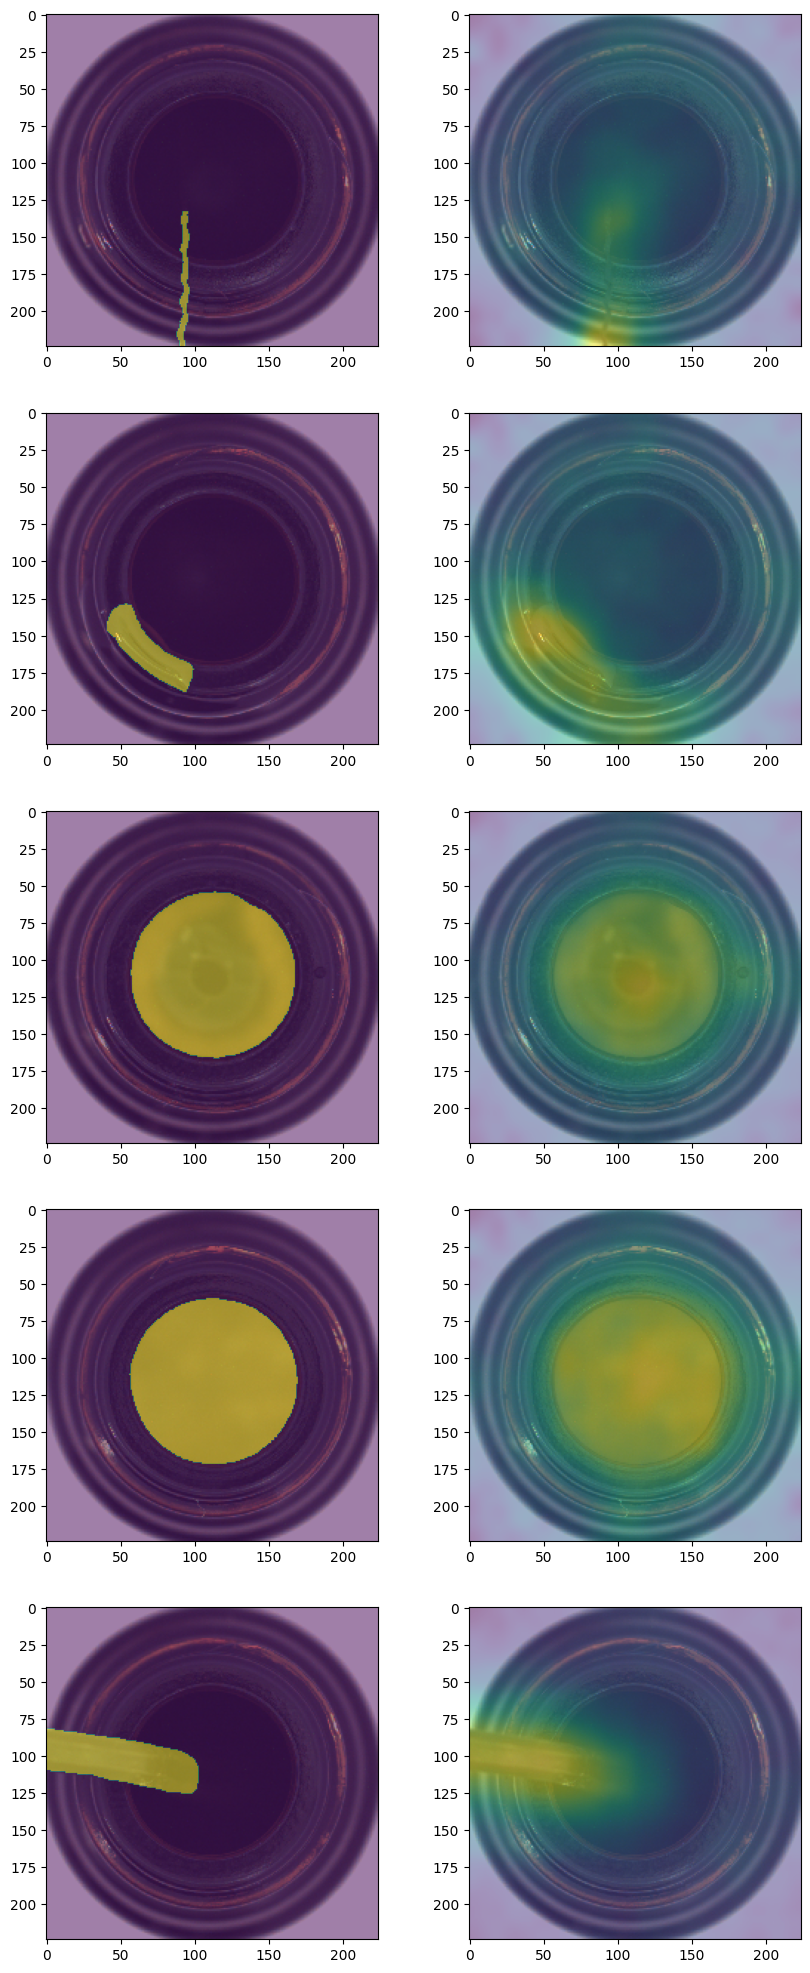

broken_small


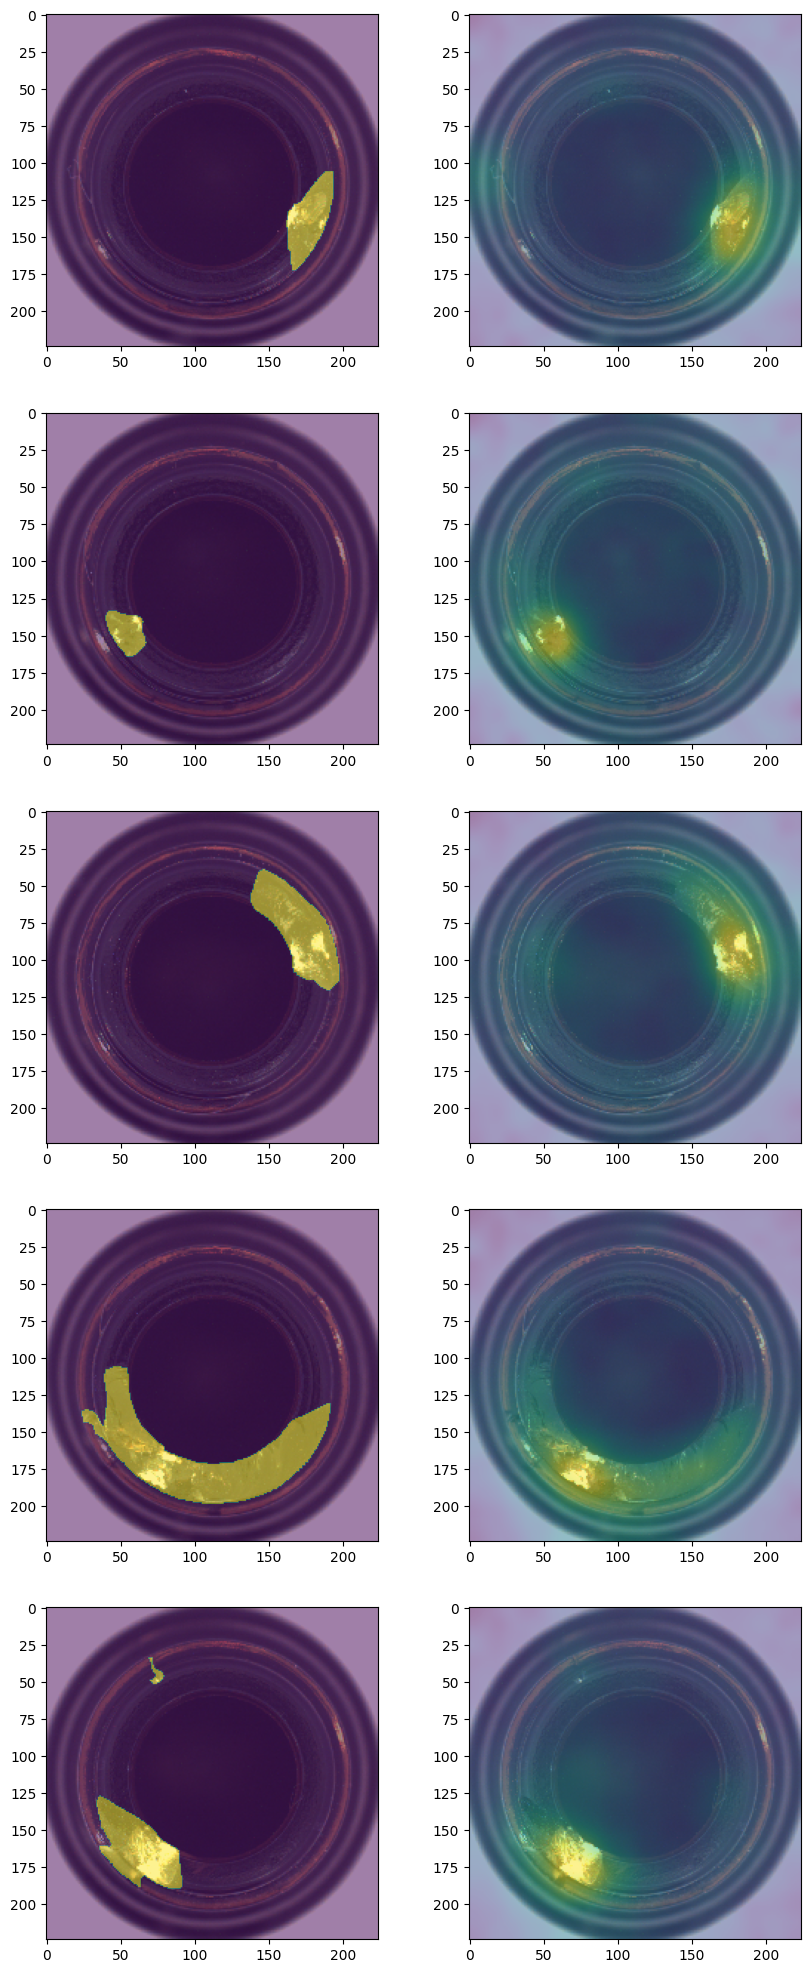

broken_large


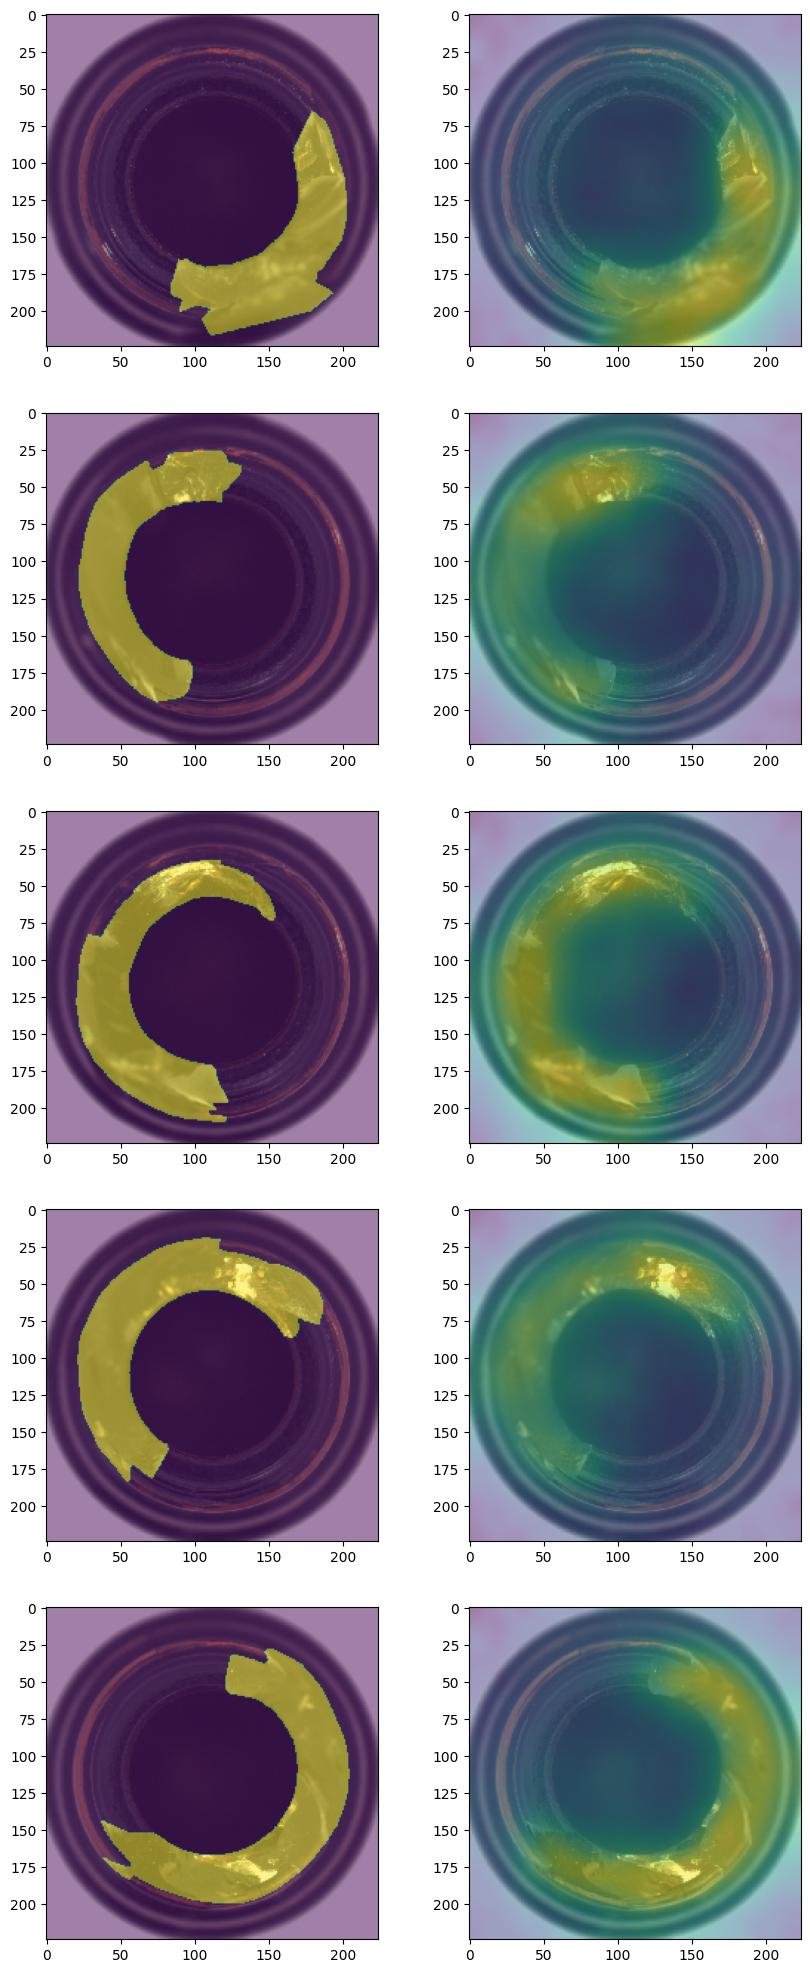

good


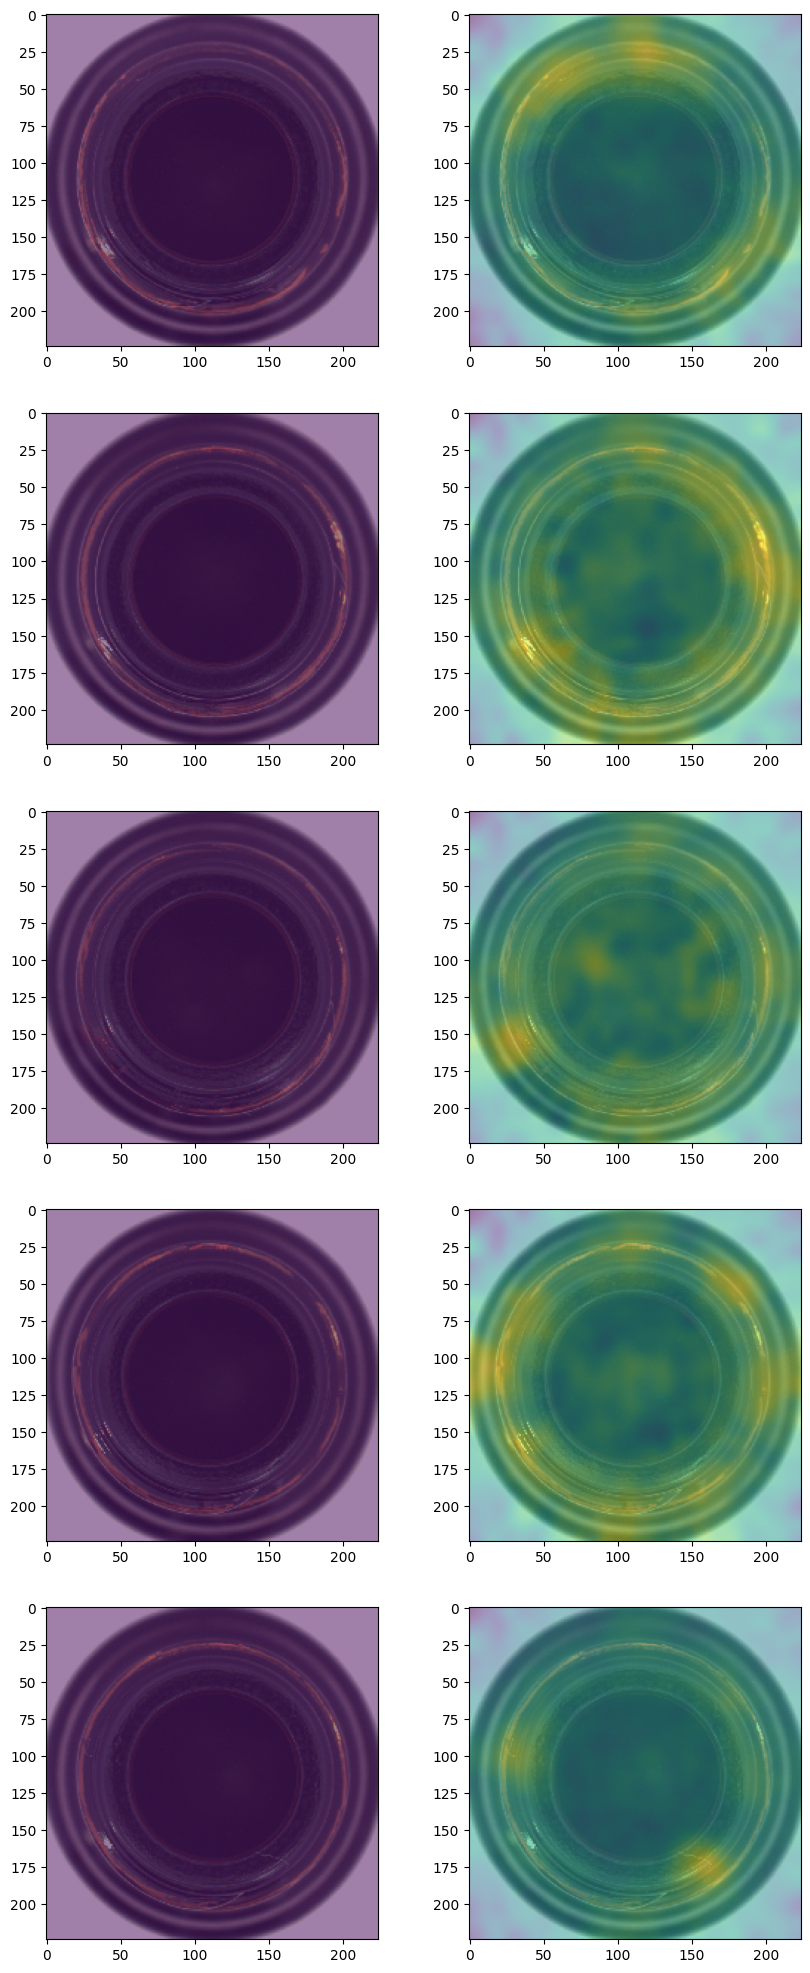

In [20]:
n = 5
for t in types:
    print(t, f1_per_sample[anom_types ==t].min(), f1_per_sample[anom_types ==t].max(), f1_per_sample[anom_types ==t].mean())
    print("f1 for type=",t, f1_score(image_labels[anom_types ==t], image_preds[anom_types ==t]>best_treshold_image))

for t in types:
    print(t)
    plt.figure(figsize=(10, n*5))
    idxs  = np.argsort(anom_types==t)[::-1][:n]
    for i, idx in enumerate(idxs):
        sample, mask, _, original_info = test_dl.dataset.__getitem__(idx)
        plt.subplot(n,2,i*2+1)
        plt.imshow(mask[0].numpy())
        plt.imshow(original_info["image"].numpy().transpose(1,2,0), alpha=0.5)
        plt.axis('off')
        plt.subplot(n,2,i*2+2)
        #print(sample.shape)
        score, segm_map = patch_core.predict(torch.Tensor([sample.numpy()])) 
        plt.imshow(segm_map[0].numpy())
        plt.imshow(original_info["image"].numpy().transpose(1,2,0), alpha=0.5)
        plt.axis('off')
    plt.show()
#f1_per_sample[anom_types ==types[1]]